# Logistic Regression in Practice:

Now that we have covered some of the underlying theory behind basic linear regression, let's take a look at how to get things done with scikit-learn. This won't cover hyperparameter tuning (I don't know how to do that yet), but I don't think we will need it in this case.

Let's get started with setting up our imports and visualization parameters:

In [2]:
# let's get started with our imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [27]:
# set up default visualization parameters:

mpl.rcParams['figure.figsize'] = [12,8]
viz_dict = {
    'axes.titlesize':18,
    'axes.labelsize':16,
}
sns.set_context("notebook", rc=viz_dict)
sns.set_style("whitegrid")

### Data First Look:

Ok, set-up is out of the way. The next step is to load our data that we wish to practice on. We will work with the typical nooby dataset: Iris classifications. I got the data here: https://archive.ics.uci.edu/ml/datasets/iris

_note:_ You only need the iris.data file. Even though it is a .data file, you can still use `Pandas.read_csv()` on it. 

In [4]:
# load data-set:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data = pd.read_csv('data/iris.data', names=cols)

# we will want this later:
classes = pd.unique(data['class'])
print(classes)

# Let's take a peek at the dataset:
data.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Seaborn's `pairplot` is a great tool. It allows us to look at every possible two dimensional view of our data. This is great for identifying both clustering and any linear relationships in our data, simply by looking at it. Let's apply it to the Iris dataset and see what it gives us:

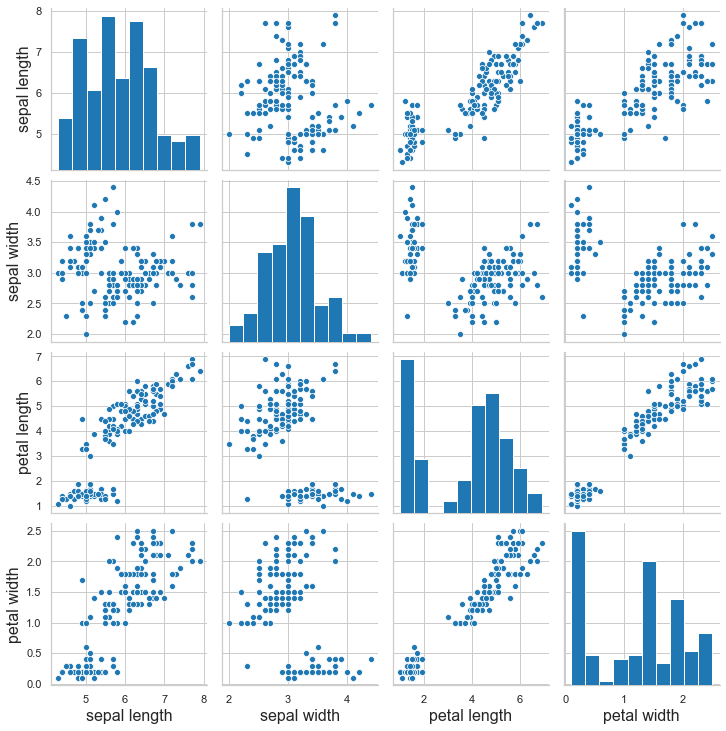

In [5]:
sns.pairplot(data)

Another interesting way to look at possible relationships is to look at the correlation matrix of our data. we will make a heatmap using Seaborn which will add some visual pop to our data, allowing us to more easily pick out patterns. 

In order for our entire dataset to be included in the correlation matrix, all of the data must be numeric. However, this dataset comes with a 'class' variable that describes the type of iris flower with a Python string. Since we want to include this data, we will convert it to integer values for each unique class. This is something we need to do anyway, before we feed the data to a machine learning algorithm:

In [13]:
# convert categorical data to numbers:
data['class'], int2class_class = pd.factorize(data['class'])

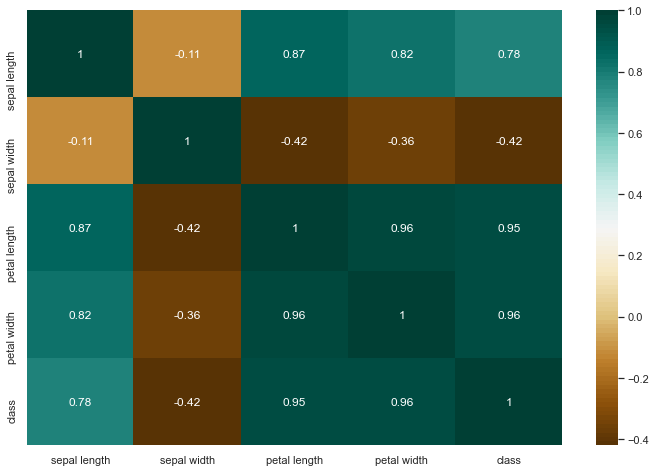

In [38]:
# create correlation matrix wrapped in a heatmap:
sns.heatmap(data.corr(), annot=True, cmap=sns.color_palette("BrBG", 100))

It looks like 'class' is highly correlated with just about every variable except for 'sepal width'. 

### Getting to work - Setting up our data for ML:

Ok, now that we have looked at our data, let's get to work with some machine learning. The following cell of code will do the following:

1. Our first step is to format the categorical data from python strings to integers. This was already done above in order to generate the correlation matrix. 

2. Next, we want to separate out our independent and dependent variables from the dataset. Below, you will see that I chose the variables of 'sepal length' and 'petal length' as my two predictor variables, and of course the type of Iris ('class') as the variable to be predicted. I did this on a hunch based on the pairplot above. We will see if this hunch works out, and maybe later explore different choices of independent variables. 

3. We want to scale our continuous data. This boosts our ML algorithm's ability to perform well on the data. If you want a refresher on what is happening mathematically, we are basically subtracting the mean of our samples from each variable, and then dividing by the standard deviation. If any of that terminology is confusing to you, I suggest taking a look at the first section of our Linear Regression chapter.

4. We split our data, reserving 20% of it as a test set that our model will not be trained on. 

5. Fit our model with the training data!

In [9]:
# seperate dependent/independant variables
X = data.loc[:,'sepal length':'petal width']
Y = data['class']

# scale continuous data points:
X = preprocessing.scale(X)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)
regressor = linear_model.LogisticRegression()

# fit model:
regressor.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Just a look at the random selection of dependent variable training data:
y_train

83     1
75     1
110    2
2      0
7      0
      ..
149    2
47     0
102    2
96     1
21     0
Name: class, Length: 120, dtype: int64

### Making Predictions:

Now that we have a trained model, it's time to use it to do some inference on the test set. We will then analyze the performance on the test data.

In [11]:
# Make predictions on test data:
y_pred = regressor.predict(x_test)
y_pred

array([1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 2, 1,
       1, 2, 0, 0, 1, 2, 1, 0], dtype=int64)

In [12]:
# a method to pretty print python dictionary:
def pprint(web, level=0):
    for k,v in web.items():
        if isinstance(v, dict):
            print('\t'*level, f'{k}: ')
            level += 1
            pprint(v, level)
            level -= 1
        else:
            print('\t'*level, k, ": ", v)

In [16]:

evaluation = metrics.classification_report(y_test, 
                                        y_pred, 
                                        labels=[0,1,2],
                                        target_names=pd.unique(classes),
                                        output_dict=True
                                       )

In [17]:
pprint(evaluation)

 Iris-setosa: 
	 precision :  1.0
	 recall :  1.0
	 f1-score :  1.0
	 support :  11
 Iris-versicolor: 
	 precision :  1.0
	 recall :  1.0
	 f1-score :  1.0
	 support :  11
 Iris-virginica: 
	 precision :  1.0
	 recall :  1.0
	 f1-score :  1.0
	 support :  8
 accuracy :  1.0
 macro avg: 
	 precision :  1.0
	 recall :  1.0
	 f1-score :  1.0
	 support :  30
 weighted avg: 
	 precision :  1.0
	 recall :  1.0
	 f1-score :  1.0
	 support :  30


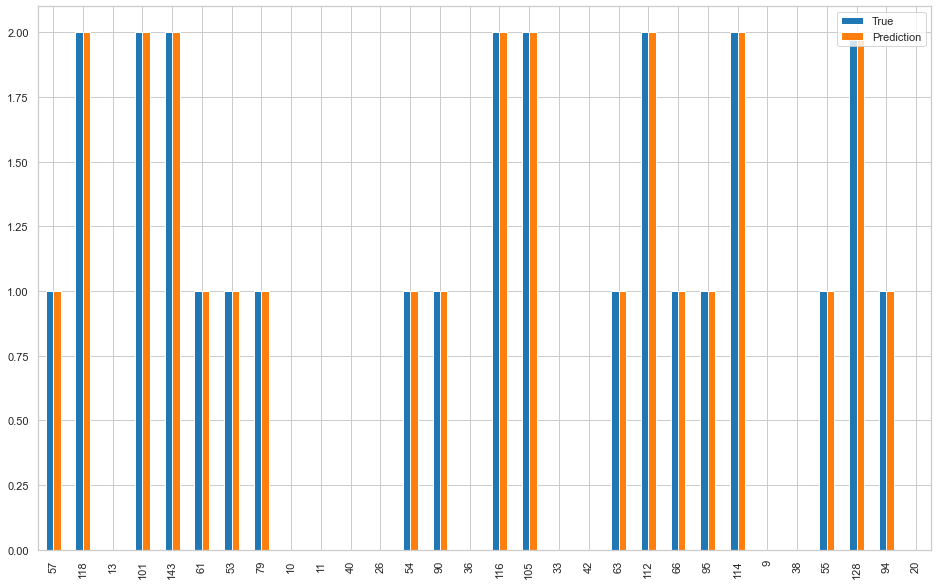

In [18]:
# So we did pretty good. 
# In fact, our model perfectly predicted the test-set's classifications. 

results = pd.DataFrame({'True': y_test, 'Prediction': y_pred})
results.plot(kind='bar')

### Visually Verifying our Results:

Now that we have made our predictions, let's look at how our predictions cluster. The above metrics tell us our accuracy was 100 percent, but maybe we want to verify this visually. After all, I'm a little surprised that there was no error. 

The idea here is to look at the clusters made by our predictive model, and then see how they match up with our original data:

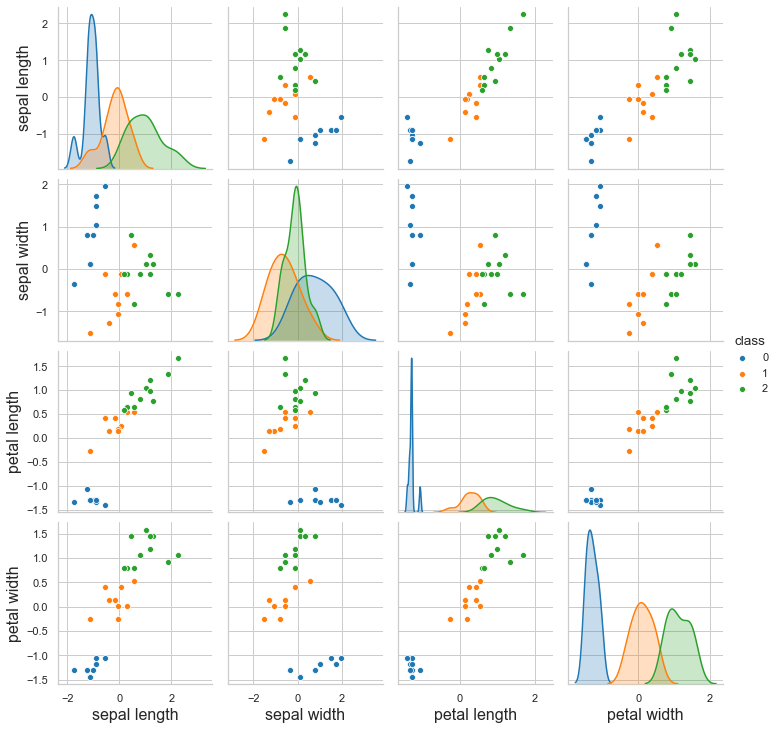

In [116]:
# create a dataframe from our prediction and plot it. 
plot_df = pd.concat([pd.DataFrame(x_test), pd.Series(y_pred)], axis=1)
plot_df.columns = data.columns
sns.pairplot(plot_df, hue='class')

Now, we can compare the "prediction" pairplot to the "actual" pairplot of our entire data-set. (we are cheating here because we knew the answer before we started the test. We are essentially just checking our work against the actual solution).

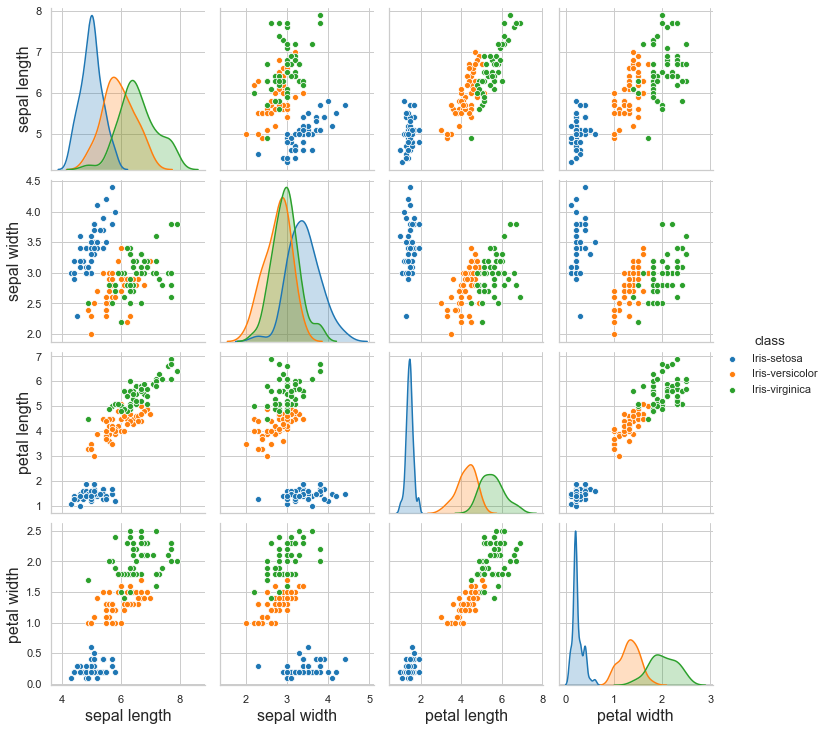

In [19]:
sns.pairplot(data, hue='class')

Yay, our plot matches the answer in the back of the book!